In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import time
import re
from urllib.request import urlopen
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

In [59]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

class InstagramBot():
    def __init__(self, email, password):
        self.browser = webdriver.Chrome()
        self.email = email
        self.password = password

    def signIn(self):
        self.browser.get('https://www.instagram.com/accounts/login/')
        time.sleep(1)
        emailInput = self.browser.find_elements_by_css_selector('form input')[0]
        passwordInput = self.browser.find_elements_by_css_selector('form input')[1]

        try:
            emailInput.send_keys(self.email)
            passwordInput.send_keys(self.password)
            passwordInput.send_keys(Keys.ENTER)
            time.sleep(2)
        except:
            print("Error with user: " + self.email)
            sys.exit(1)
        
    def not_now(self):
        self.browser.find_element_by_xpath('//button[text()="Not Now"]').click()

    def getUserFollowers(self, username, max, textfile):
        self.browser.get('https://www.instagram.com/' + username)
        followersLink = self.browser.find_element_by_css_selector('ul li a')
        followersLink.click()
        time.sleep(2)
        followersList = self.browser.find_element_by_css_selector('div[role=\'dialog\'] ul')
        numberOfFollowersInList = len(followersList.find_elements_by_css_selector('li'))
    
        followersList.click()
        actionChain = webdriver.ActionChains(self.browser)
        while (numberOfFollowersInList < max):
            actionChain.key_down(Keys.SPACE).key_up(Keys.SPACE).perform()
            time.sleep(0.5)
            numberOfFollowersInList = len(followersList.find_elements_by_css_selector('li'))
        
        followers = []
        for user in followersList.find_elements_by_css_selector('li'):
            userLink = user.find_element_by_css_selector('a').get_attribute('href')
            print(userLink)
            followers.append(userLink)
            if (len(followers) == max):
                break
        
        with open(textfile, 'w') as f:
            for follower in followers:
                f.write(follower[len('https://www.instagram.com/'):-1] +  "\n")
        return followers

    def closeBrowser(self):
        self.browser.close()

    def __exit__(self, exc_type, exc_value, traceback):
        self.closeBrowser()
        
        
#bot = InstagramBot('sejaldua@gmail.com', 'Sejalu99')
#bot.signIn()

In [60]:
bot = InstagramBot('sejaldua@gmail.com', 'Sejalu99')
bot.signIn()
bot.not_now()
followers = bot.getUserFollowers('sejaldua99', 1000, 'sejal_followers.txt')
print(followers)

https://www.instagram.com/winningwiener/
https://www.instagram.com/notnathansiu/
https://www.instagram.com/erikaaanakagawa/
https://www.instagram.com/camillebowman/
https://www.instagram.com/angelowilliams_/
https://www.instagram.com/tasaattufts/
https://www.instagram.com/eestevens0131/
https://www.instagram.com/finnmcgarg/
https://www.instagram.com/_lo_clo/
https://www.instagram.com/sahil_deo/
https://www.instagram.com/liddymalone/
https://www.instagram.com/anniedae/
https://www.instagram.com/raishazain/
https://www.instagram.com/mfieds/
https://www.instagram.com/instagraceagram_official/
https://www.instagram.com/harrislerner/
https://www.instagram.com/matthew__stout/
https://www.instagram.com/isabel_freedman/
https://www.instagram.com/rach.lowell/
https://www.instagram.com/alex.neustrup/
https://www.instagram.com/meganmarkanthony/
https://www.instagram.com/lucykp_/
https://www.instagram.com/siriwesterheim/
https://www.instagram.com/mielaefraim/
https://www.instagram.com/annamcguire2

https://www.instagram.com/anniedu927/
https://www.instagram.com/oven16/
https://www.instagram.com/cansugundem/
https://www.instagram.com/mratelle_24/
https://www.instagram.com/clairetierney_/
https://www.instagram.com/mamma.miaaa/
https://www.instagram.com/isabellaponcee/
https://www.instagram.com/turndatpaige/
https://www.instagram.com/abigailradey/
https://www.instagram.com/ryan_weinstein3/
https://www.instagram.com/ellamphoto/
https://www.instagram.com/kedi.hickman/
https://www.instagram.com/tristan_mccabe/
https://www.instagram.com/ahegstrom_/
https://www.instagram.com/jordynturnerr/
https://www.instagram.com/jonah_yousif/
https://www.instagram.com/n.j.clevenger/
https://www.instagram.com/sh4nd4.p4nd4/
https://www.instagram.com/thorn.in.ur.side/
https://www.instagram.com/vaishnav_gubba/
https://www.instagram.com/shahva99/
https://www.instagram.com/bmhphotographi/
https://www.instagram.com/julianlang/
https://www.instagram.com/maddysm.th/
https://www.instagram.com/jacqueline.kirk/
h

https://www.instagram.com/benhershey/
https://www.instagram.com/sneha_menon06/
https://www.instagram.com/harperhummelt/
https://www.instagram.com/dyerhealy/
https://www.instagram.com/jsharabu/
https://www.instagram.com/taylorhamper24/
https://www.instagram.com/pratiki07/
https://www.instagram.com/sarvind_98/
https://www.instagram.com/saakshi_k/
https://www.instagram.com/arnnesh/
https://www.instagram.com/rupinderjitbriar/
https://www.instagram.com/sssnehaaa/
https://www.instagram.com/kendall.marsh/
https://www.instagram.com/davidcosper_/
https://www.instagram.com/eavega21/
https://www.instagram.com/thomashochman/
https://www.instagram.com/mike_murphyy_/
https://www.instagram.com/britillium/
https://www.instagram.com/rahulmajmudar2/
https://www.instagram.com/jesuit_entrepreneur/
https://www.instagram.com/daryl9930/
https://www.instagram.com/akshayraj_/
https://www.instagram.com/ieshacomia4/
https://www.instagram.com/james.lawliss/
https://www.instagram.com/carly.suter/
https://www.insta

https://www.instagram.com/miafurnanz13/
https://www.instagram.com/nataliecmanlove/
https://www.instagram.com/reillygod/
https://www.instagram.com/priya_m17/
https://www.instagram.com/madmen121/
https://www.instagram.com/marce.h.h/
https://www.instagram.com/sarahstrba/
https://www.instagram.com/johnswanmankeller/
https://www.instagram.com/allicolombo/
https://www.instagram.com/jack.meier/
https://www.instagram.com/awiltjer/
https://www.instagram.com/niki_lalwani/
https://www.instagram.com/lakshya.b/
https://www.instagram.com/mtobin_97/
https://www.instagram.com/kruthi_anni/
https://www.instagram.com/skylar.hawkins/
https://www.instagram.com/halinadelarosa/
https://www.instagram.com/fiftyshadesofday/
https://www.instagram.com/chasejohnson18/
https://www.instagram.com/christian_frenchtoast/
https://www.instagram.com/danielseabiscuit/
https://www.instagram.com/samueljudge/
https://www.instagram.com/jamba_mamba/
https://www.instagram.com/livlacuna/
https://www.instagram.com/nataliebridgetta

https://www.instagram.com/peyton_mcauliffe/
https://www.instagram.com/donnie.mcmahon/
https://www.instagram.com/emfergus/
https://www.instagram.com/soolynn11/
https://www.instagram.com/ellamenashe/
https://www.instagram.com/lbeckett15/
https://www.instagram.com/jaclynflood/
https://www.instagram.com/anna.branche/
https://www.instagram.com/sydgar97/
https://www.instagram.com/mayalawliss/
https://www.instagram.com/varshakalavar/
https://www.instagram.com/liashaw_/
https://www.instagram.com/kaythlinyus/
https://www.instagram.com/janamparo/
https://www.instagram.com/julialaurengerig5/
https://www.instagram.com/adisrikanthan/
https://www.instagram.com/ramseysullivan/
https://www.instagram.com/gracemanthey/
https://www.instagram.com/marvahg/
https://www.instagram.com/haley_parker2/
https://www.instagram.com/jenniemenendez/
https://www.instagram.com/aashnasaxena/
https://www.instagram.com/nicopiccini/
https://www.instagram.com/henrywineman/
https://www.instagram.com/lbplbplbpx3/
https://www.i

2019-09-21


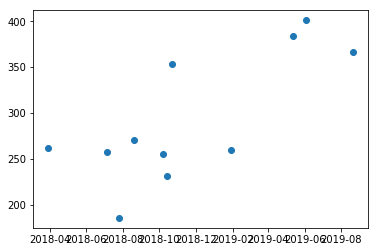

In [51]:
import json
import re
from datetime import date
import time
import dateutil.parser
import matplotlib.pyplot as plt


now = date.fromtimestamp(time.time())
print(now)

filename = "profiles/sejaldua99_2019-09-21 11-18-04.json"
filename = "profiles/rahul_dua2_2019-09-21 12-02-48.json"
#Read JSON data into the datastore variable
if filename:
    with open(filename, 'r') as f:
        datastore = json.load(f)

#Use the new datastore datastructure
dates = [datastore['posts'][i]['date'] for i in range(len(datastore['posts']))]
converted_dates = [dateutil.parser.parse(dates[i]) for i in range(len(dates))]
likes = [datastore['posts'][i]['likes']['count'] for i in range(len(datastore['posts']))]

plt.scatter(converted_dates, likes)
    

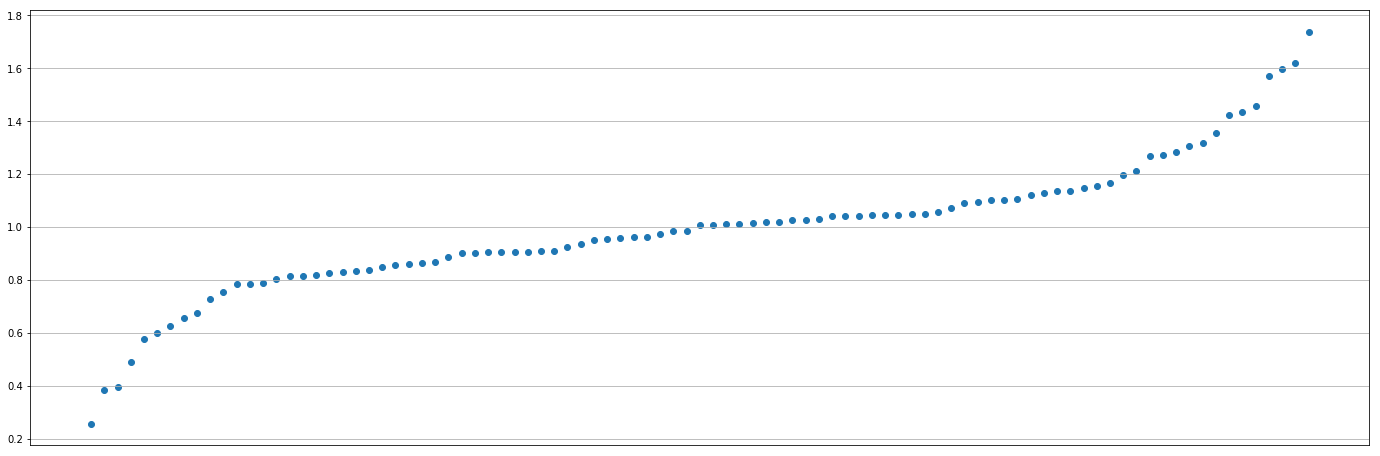

In [93]:
import json
import re
from datetime import date
import time
import dateutil.parser
import matplotlib.pyplot as plt
import os

followers = []
following = []
users = []

json_files = [pos_json for pos_json in os.listdir('profiles/') if pos_json.endswith('.json')]
#Read JSON data into the datastore variable
for filename in json_files:
    with open('profiles/' + filename, 'r') as f:
        datastore = json.load(f)

        
    #Use the new datastore datastructure
    users.append(datastore['username'])
    followers.append(datastore['followers']['count'])
    following.append(datastore['following']['count'])

ratios = [followers[i] / following[i] for i in range(len(users))]
Z = [x for _,x in sorted(zip(ratios,users))]
W = [y for y,_ in sorted(zip(ratios,users))]
fig = plt.figure(figsize = (24, 8))
plt.scatter(Z[0:-1], W[0:-1]);
plt.xticks([])
plt.grid()
fig.save

In [56]:
import requests
location_id = '235898755'
url = 'https://www.instagram.com/explore/locations/' + location_id + '/?__a=1'
print(len(location_id))
response = requests.get(url)
print(response)
if 'json' in response.headers.get('Content-Type'):
    js = response.json()
else:
    print('Response content is not in JSON format.')
    js = json.loads(response.text)
# with open(response, 'r') as f:
#     data = json.loads(f.read())
# lat = data['graphql']['location']['lat']
# print("latitude", lat)
# lng = data['graphql']['location']['lng']
# print("longitude", lng)

9
<Response [200]>
Response content is not in JSON format.


JSONDecodeError: Expecting value: line 1 column 1 (char 0)